In [ ]:
from mpi4py import MPI
import numpy as np
import h5py
import dxchange
import torch as tc
import os
import torch as tc
import torch.nn.functional as F
from tqdm import tqdm
import csv
import types
import matplotlib.font_manager
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib 
# matplotlib.font_manager._rebuild()
matplotlib.rcParams['pdf.fonttype'] = 'truetype'

fontProperties = {'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

import matplotlib as mpl
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
from matplotlib.colors import SymLogNorm

(6, 32, 124, 124)
0.0


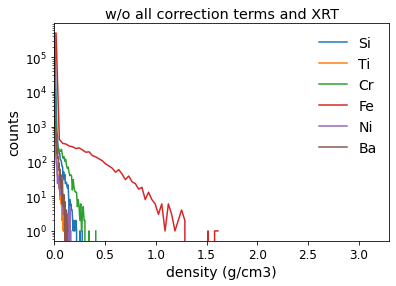

In [45]:
element_ls = ['Si', 'Ti', 'Cr', 'Fe', 'Ni', 'Ba' ]

recon_folder = 'Ab_F_ProbeAtt_F_nEl_6_nDpts_4_b1_0.0_lr_1.0e-3_200epochs'
with h5py.File(os.path.join(recon_folder, 'grid_concentration.h5'), 'r') as f:
    recon = f["sample/densities"][...].astype(np.float32)

print(recon.shape) 
print(np.prod(recon[1:]))
plt.title('w/o all correction terms and XRT')
for i_element in range(recon.shape[0]):
    recon_density = np.reshape(recon[i_element], int(np.prod(recon.shape[1:])))
    y, binEdges = np.histogram(recon_density, bins=50)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    plt.plot(bincenters, y, '-', label=element_ls[i_element])
    plt.yscale('log')
    plt.xlim([0, 3.3])
    plt.xlabel("density (g/cm3)", fontsize=14)
    plt.ylabel('counts', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
# plt.savefig('wo all correction terms and XRT.pdf')

(6, 32, 124, 124)
0.0


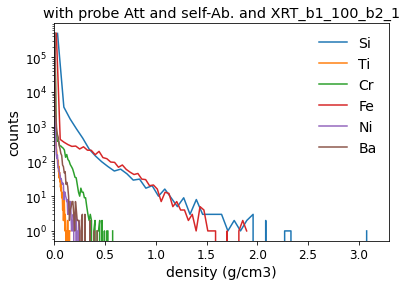

In [41]:
element_ls = ['Si', 'Ti', 'Cr', 'Fe', 'Ni', 'Ba' ]
recon_folder = 'Ab_T_nEl_6_nDpts_4_b1_1e2_b2_1e0_lr_1.0e-3'
with h5py.File(os.path.join(recon_folder, 'grid_concentration.h5'), 'r') as f:
    recon = f["sample/densities"][...].astype(np.float32)

print(recon.shape) 
print(np.prod(recon[1:]))
plt.title('with probe Att and self-Ab. and XRT_b1_100_b2_1')
for i_element in range(recon.shape[0]):
    recon_density = np.reshape(recon[i_element], int(np.prod(recon.shape[1:])))
    y, binEdges = np.histogram(recon_density, bins=50)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    plt.plot(bincenters, y, '-', label=element_ls[i_element])
    plt.yscale('log')
    plt.xlim([0, 3.3])
    plt.xlabel("density (g/cm3)", fontsize=14)
    plt.ylabel('counts', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
# plt.savefig('with probe Att and self-Ab and XRT_b1_100_b2_1.pdf')

(6, 32, 124, 124)
0.0


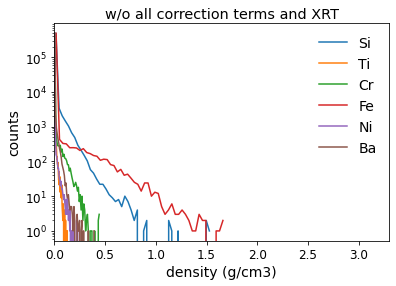

In [42]:
element_ls = ['Si', 'Ti', 'Cr', 'Fe', 'Ni', 'Ba' ]

recon_folder = 'Ab_F_nEl_6_nDpts_4_b1_1e2_b2_1e0_lr_1.0e-3'
with h5py.File(os.path.join(recon_folder, 'grid_concentration.h5'), 'r') as f:
    recon = f["sample/densities"][...].astype(np.float32)

print(recon.shape) 
print(np.prod(recon[1:]))
plt.title('w/o all correction terms and XRT')
for i_element in range(recon.shape[0]):
    recon_density = np.reshape(recon[i_element], int(np.prod(recon.shape[1:])))
    y, binEdges = np.histogram(recon_density, bins=50)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    plt.plot(bincenters, y, '-', label=element_ls[i_element])
    plt.yscale('log')
    plt.xlim([0, 3.3])
    plt.xlabel("density (g/cm3)", fontsize=14)
    plt.ylabel('counts', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
# plt.savefig('with probe Att and XRT.pdf')

In [18]:
hist_data = np.ones((4, 2, 100))
hist_bin_center = np.ones((4, 2, 100))
recon_folder_ls = ['sample8_size_64_pad/nElements_2', 'sample_8_size_64_test_recon_probeAtt_False', 'sample_8_size_64_test_recon_Ab_XRFT_b1_10E4_b2_1E0', 'sample_8_size_64_test_recon_XRFT_b1_10E4_b2_1E0']
element_ls = ['Ca', 'Sc']

for i_recon in range(len(recon_folder_ls)):
    with h5py.File(os.path.join(recon_folder_ls[i_recon], 'grid_concentration.h5'), 'r') as f:
        recon = f["sample/densities"][...].astype(np.float32)
        
    for i_element in range(recon.shape[0]):
        recon_density = np.reshape(recon[i_element], int(np.prod(recon.shape[1:])))
        y, binEdges = np.histogram(recon_density, bins=100)
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1]) 
        hist_data[i_recon, i_element] = y
        hist_bin_center[i_recon, i_element] = bincenters
        

In [19]:
condition_ls = ['0','1','2','3']

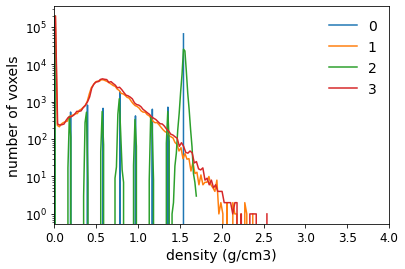

In [23]:
i_element=0
for i_recon in range(4):
    plt.plot(hist_bin_center[i_recon, i_element], hist_data[i_recon, i_element] , '-', label=condition_ls[i_recon])
    plt.yscale('log')
    plt.xlim([0, 4])
    plt.xlabel("density (g/cm3)", fontsize=14)
    plt.ylabel('number of voxels', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
plt.savefig('Ca.pdf')

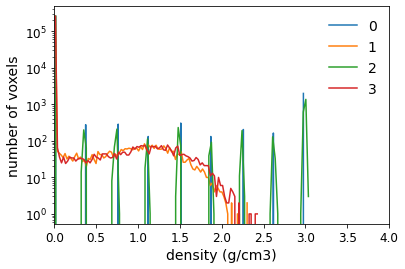

In [22]:
i_element=1
for i_recon in range(4):
    plt.plot(hist_bin_center[i_recon, i_element], hist_data[i_recon, i_element] , '-', label=condition_ls[i_recon])
    plt.yscale('log')
    plt.xlim([0, 4])
    plt.xlabel("density (g/cm3)", fontsize=14)
    plt.ylabel('number of voxels', fontsize=14)
    plt.legend(frameon=False, fontsize=14)
plt.savefig('Sc.pdf')